<a href="https://colab.research.google.com/github/geojaimo/relevel/blob/main/EDA_supermarket_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Geo visulaizations
import folium

In [2]:
# changing default figure size

plt.rcParams['figure.figsize']=(10,5)

In [3]:
# setting theme for charts

plt.style.use('ggplot')

In [4]:
data_dict=pd.read_csv('/content/data_dict.csv')
data_dict

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a...
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has st...
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


In [5]:
sales_data=pd.read_csv('/content/supermarket_sales.csv')
sales_data.head(20).style.background_gradient(cmap='hot') # Like conditional formating in excel

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,nan,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,nan,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,nan,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,nan,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,nan,96.089100,21.958800


In [6]:
sales_data.shape

(1000, 20)

In [7]:
sales_data.describe()[1:].style.background_gradient(cmap='hot') # count is omitted for formating purpose

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


In [8]:
# To check data type and null count
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

In [9]:
# Number of null values

sales_data.isna().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type               48
Gender                      25
Product line                23
Unit price                   0
Quantity                     0
Tax 5%                     104
Total                        0
Date                         0
Time                         0
Payment                     21
cogs                         0
gross margin percentage      0
gross income                 0
Rating                     143
Longitude                    0
Latitude                     0
dtype: int64

In [10]:
# Null % for all the columns in data

null_perc=sales_data.isna().sum()/len(sales_data)*100
null_perc.sort_values(ascending=False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

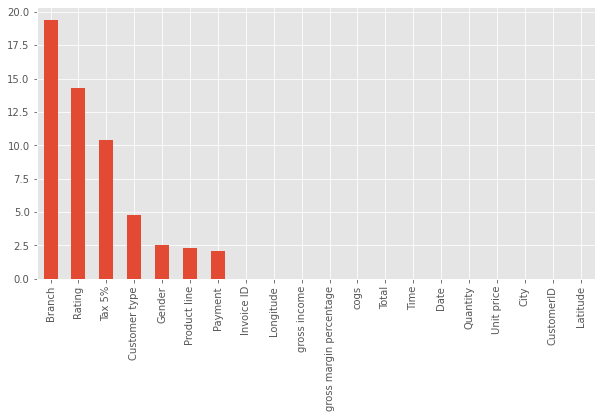

In [11]:
# To display the non-null values count
null_perc.sort_values(ascending=False).plot(kind='bar')

Imputing null with values

In [12]:
sales_data_2=sales_data.copy()

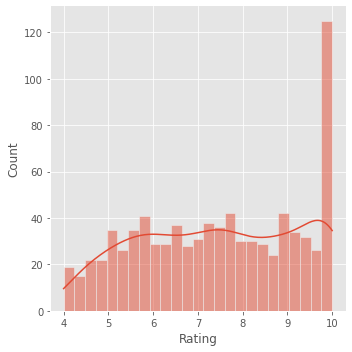

In [13]:
sns.displot(sales_data_2['Rating'],bins=25,kde=True)

In [14]:
sales_data_2['Rating'].describe()

count    857.000000
mean       7.462625
std        1.776179
min        4.000000
25%        5.900000
50%        7.455000
75%        9.100000
max       10.000000
Name: Rating, dtype: float64

In [15]:
sales_data_2['Rating']=sales_data_2["Rating"].fillna(sales_data_2['Rating'].mean)
sales_data_2['Rating'].isnull().sum()

0

In [16]:
sales_data_2['Tax 5%']=sales_data_2['Tax 5%'].fillna(sales_data_2['Total']*0.05)
sales_data_2['Tax 5%'].isna().sum()

0

In [17]:
def impute_mode(col):
  sales_data_2[col]=sales_data_2[col].fillna(sales_data_2[col].mode()[0])


In [18]:
impute_mode('Customer type')
impute_mode('Payment')
impute_mode('Gender')
impute_mode('Product line')

In [19]:
# we can see that only null in branch is left
sales_data_2.isna().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Longitude                    0
Latitude                     0
dtype: int64

In [20]:
sales_data_2[['Branch','City']].drop_duplicates()

,Branch,City
0,A,Yangon
1,C,Naypyitaw
9,B,Mandalay
178,NaN,Yangon
179,NaN,Naypyitaw
185,NaN,Mandalay


In [21]:
# To impute corresponding branch code for the city

for i in range(len(sales_data_2['Branch'])):
  if pd.isna(sales_data_2['Branch'][i]) ==True:
    if(sales_data_2['City'][i].strip() == 'Yangon'):
      sales_data_2['Branch'][i]='A'
    elif(sales_data_2['City'][i].strip() == 'Mandalay'):
      sales_data_2['Branch'][i]='B'
    elif(sales_data_2['City'][i].strip() == 'Naypyitaw'):
      sales_data_2['Branch'][i]='C'
    else:
      print('Invalid city')



<ipython-input-21-1375332c03d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2['Branch'][i]='A'
<ipython-input-21-1375332c03d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2['Branch'][i]='C'
<ipython-input-21-1375332c03d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2['Branch'][i]='B'


In [22]:
# we can see all null are imputed 
sales_data_2.isna().sum()

Invoice ID                 0
Branch                     0
CustomerID                 0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Longitude                  0
Latitude                   0
dtype: int64

In [23]:
# convert date column to date time format
sales_data_2.Date=pd.to_datetime(sales_data_2.Date)

In [24]:
# Add a month,day and weekday columns
sales_data_2['month']=sales_data_2.Date.dt.month
sales_data_2['day']=sales_data_2.Date.dt.day
sales_data_2['weekday']=sales_data_2.Date.dt.day_name()

In [25]:
# Add a hour and minute column
sales_data_2['hour']=sales_data_2.Time.str[0:2]
sales_data_2['minute']=sales_data_2.Time.str[3:5]
#make it int values
sales_data_2['hour']=pd.to_numeric(sales_data_2['hour'])
sales_data_2['minute']=pd.to_numeric(sales_data_2['minute'])

Visualization


In [26]:
def univariate_quant(col,hue=None):

  fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,6))
  axes[1].set_title('stripplot of '+ col,size=14)
  sns.stripplot(sales_data[col],ax=axes[1], color='#4CB391')

  axes[0].set_title('violinplot of '+ col, size=14)
  sns.violinplot(sales_data_2[col],ax=axes[0], color='grey')

  plt.tight_layout()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


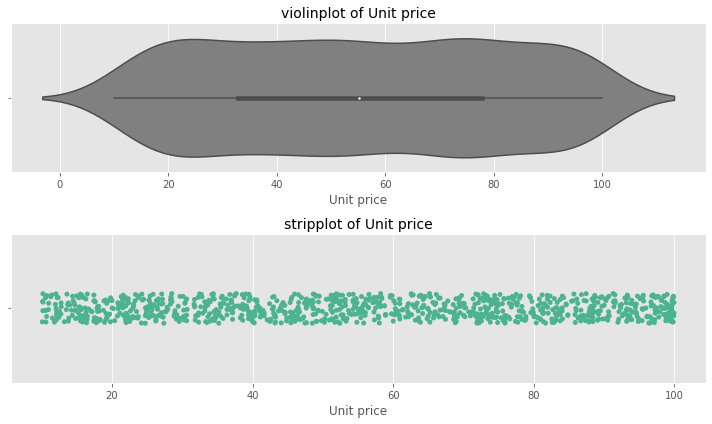

In [27]:
univariate_quant('Unit price')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


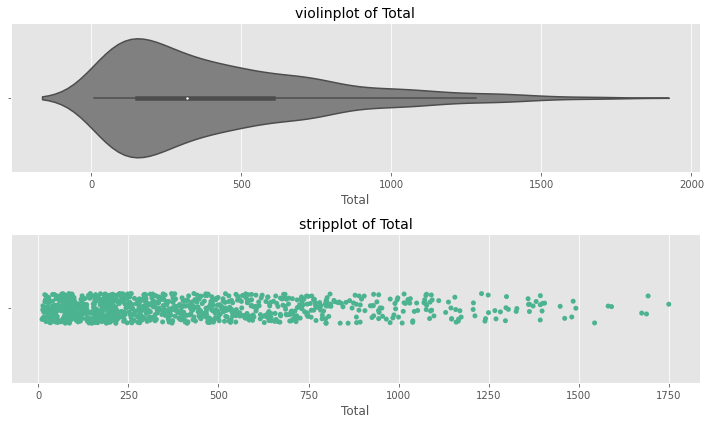

In [28]:
univariate_quant('Total')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


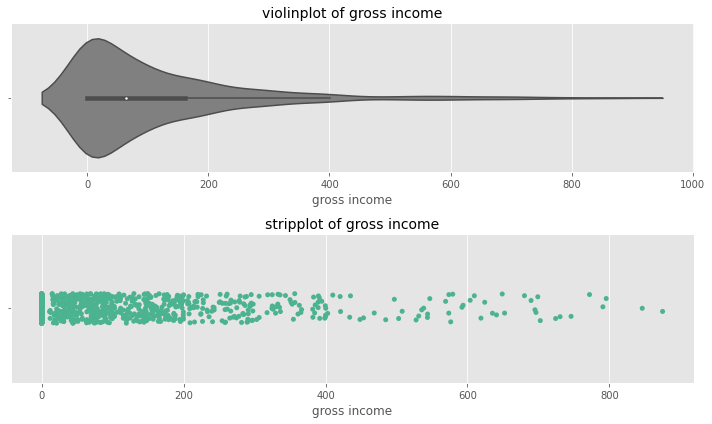

In [29]:
univariate_quant('gross income')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


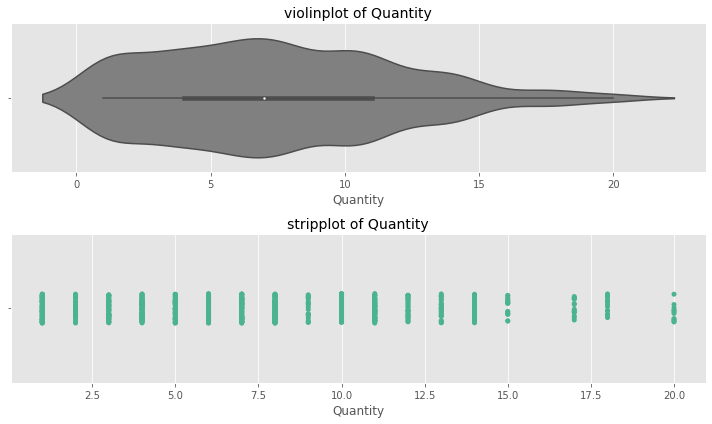

In [30]:
univariate_quant('Quantity')

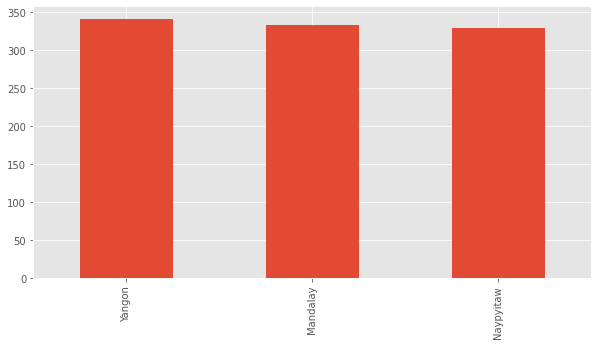

In [31]:
sales_data_2['City'].value_counts().head(10).plot.bar()
plt.show()

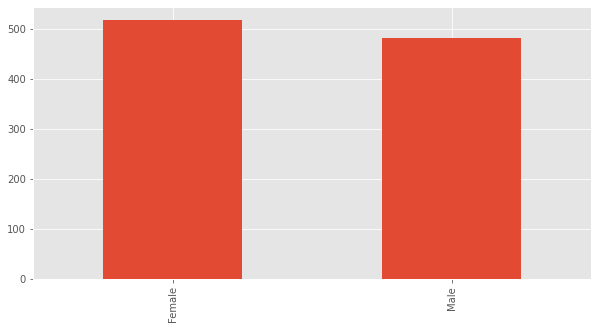

In [32]:
sales_data_2['Gender'].value_counts().head(10).plot.bar()

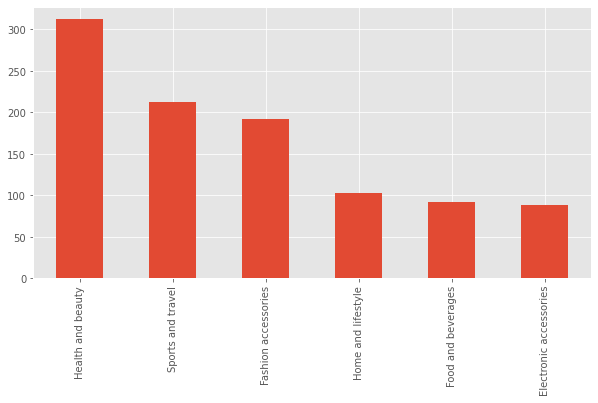

In [33]:
sales_data_2['Product line'].value_counts().head(10).plot.bar()

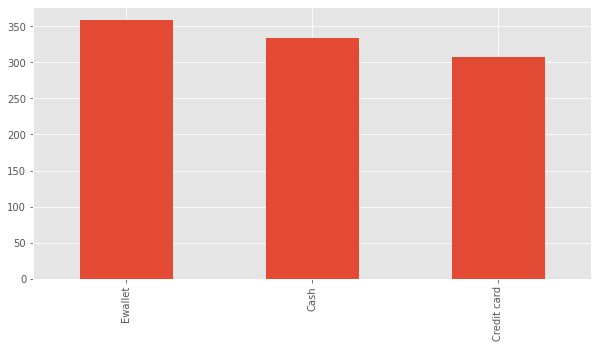

In [34]:
sales_data_2['Payment'].value_counts().head(10).plot.bar()

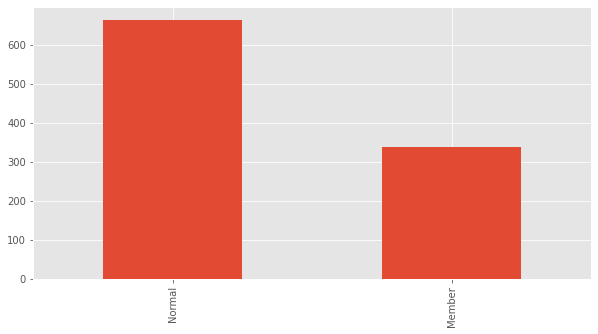

In [35]:
sales_data_2['Customer type'].value_counts().head(10).plot.bar()
plt.show()

,Customer type,CustomerID
0,Member,248
1,Normal,384


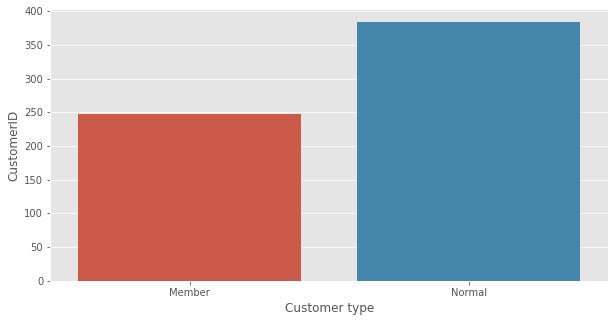

In [36]:
customer_members = sales_data_2[['CustomerID','Customer type']].groupby(['Customer type'], as_index = False).nunique()
sns.barplot(x=customer_members["Customer type"], y='CustomerID',data=customer_members)

customer_members

In [37]:
Cities_geo= sales_data_2[['City','Longitude','Latitude']].drop_duplicates()
Cities_geo

,City,Longitude,Latitude
0,Yangon,96.1735,16.8409
1,Naypyitaw,96.0785,19.7633
9,Mandalay,96.0891,21.9588


In [38]:
# geo analysis using map

for (i, j) in Cities_geo.iterrows():
  print(i)
  print('\n', j)

geo_map = folium.Map(location =[16.8409,96.1735], zoom_start = 5,
                     width = 1000, height = 500,
                     tiles = 'CartoDB Positron', control_scale = True)

for (i, j) in Cities_geo.iterrows():
  folium.Marker(location = [j.loc['Latitude'], j.loc['Longitude']], popup = j.loc['City'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(geo_map)

geo_map


0

 City          Yangon
Longitude    96.1735
Latitude     16.8409
Name: 0, dtype: object
1

 City         Naypyitaw
Longitude      96.0785
Latitude       19.7633
Name: 1, dtype: object
9

 City         Mandalay
Longitude     96.0891
Latitude      21.9588
Name: 9, dtype: object


,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Longitude,Latitude,month,day,hour,minute
Unit price,1.000000,0.020421,0.587456,0.587456,0.633866,0.373541,-0.025503,0.015714,-0.005059,0.022648,0.008242,-0.006869
Quantity,0.020421,1.000000,0.745821,0.745821,0.651471,0.715042,-0.181683,0.224890,0.023197,-0.010314,0.003728,0.012336
Tax 5%,0.587456,0.745821,1.000000,1.000000,0.942327,0.850590,-0.154348,0.173671,0.010050,0.010679,0.010177,-0.010294
Total,0.587456,0.745821,1.000000,1.000000,0.942327,0.850590,-0.154348,0.173671,0.010050,0.010679,0.010177,-0.010294
cogs,0.633866,0.651471,0.942327,0.942327,1.000000,0.625543,-0.032557,0.014986,0.006236,0.017777,-0.003250,-0.028504
gross income,0.373541,0.715042,0.850590,0.850590,0.625543,1.000000,-0.308645,0.381293,0.013629,-0.003034,0.028828,0.020787
Longitude,-0.025503,-0.181683,-0.154348,-0.154348,-0.032557,-0.308645,1.000000,-0.858559,-0.005958,-0.027279,-0.051414,-0.057099
Latitude,0.015714,0.224890,0.173671,0.173671,0.014986,0.381293,-0.858559,1.000000,-0.015140,0.025972,0.061723,0.066378
month,-0.005059,0.023197,0.010050,0.010050,0.006236,0.013629,-0.005958,-0.015140,1.000000,0.009234,-0.030814,0.037181
day,0.022648,-0.010314,0.010679,0.010679,0.017777,-0.003034,-0.027279,0.025972,0.009234,1.000000,0.051446,-0.006034


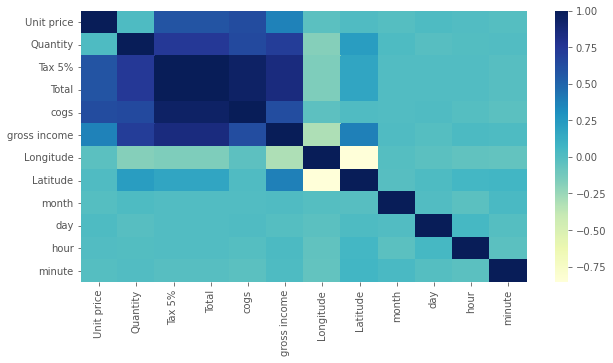

In [39]:
heatmap_data=sales_data_2.corr()
heatmap_data=heatmap_data.drop(['gross margin percentage'],axis=1)
heatmap_data=heatmap_data.drop(['gross margin percentage'],axis=0)
sns.heatmap(heatmap_data, cmap='YlGnBu')

heatmap_data

In [40]:
sales_data_2.columns

Index(['Invoice ID', 'Branch', 'CustomerID', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Longitude', 'Latitude', 'month', 'day', 'weekday', 'hour',
       'minute'],
      dtype='object')

In [41]:
# Defining function for Univariate Analysis of Quantitative Variables

def grouped_analysis(col,hue=None):
    
    
    def custom_fmt(x):                                                     # Custom format function to show values in pie chart
        return '{:.0f}%\n({:.0f})'.format(x, sales_grouped['Total'].sum()*x/100)  # It is used in autopct parameter in pie chart

    
    sales_grouped= sales_data_2[[col,'Total']].groupby(col).sum()                # Sales grouped by col
    mean_ratings = sales_data_2[[col,'Rating']].groupby(col).mean()              # Avg ratings grouped by col
    aov  = sales_data_2[[col,'Total']].groupby(col).mean()                       # AOV by col
    mean_units_qty = sales_data_2[[col,'Quantity']].groupby(col).mean()          # Mean order qty by col

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(10,6))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart title for Subplot 1
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)
   
    axes[0,0].pie(sales_grouped['Total'], labels = sales_grouped.index, autopct= custom_fmt,textprops={'fontsize': 14})


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    g=sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1]) 
    g.set_xticklabels(
    labels=aov.index, rotation=45)                                                # Rotating lables so that they dont overlap
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()

In [44]:
# Defining function for Univariate Analysis of Quantitative Variables

def timeseries_analysis(col,hue=None):
    
    
    sales_grouped= sales_data_2[[col,'Total']].groupby(col).sum()              # Sales grouped by col
    mean_ratings = sales_data_2[[col,'Rating']].groupby(col).mean()            # Avg ratings grouped by col
    aov  = sales_data_2[[col,'Total']].groupby(col).mean()                      # AOV by col
    mean_units_qty = sales_data_2[[col,'Quantity']].groupby(col).mean()         # Mean order qty by col


    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(10,6))                      # Defining 4 subplots, changing fig size
     
    
    axes[0,0].set_title("Sales by " + col , size = 25)                            # Chart titl for Subplot 1
    sns.lineplot(x=sales_grouped.index , y= sales_grouped['Total'], data=sales_grouped, ax=axes[0,0])


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              #  Title for Subplot 2
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,1].get_xticklabels(),fontsize=20)
    axes[0,1].set_ylabel( axes[0,1].get_yticklabels(),fontsize=20)
    sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1])    
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                      # Title for Subplot 3
    axes[1,0].set_xlabel( axes[1,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[1,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                    # Title for Subplot 4
    axes[1,1].set_xlabel( axes[1,1].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[1,1].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()

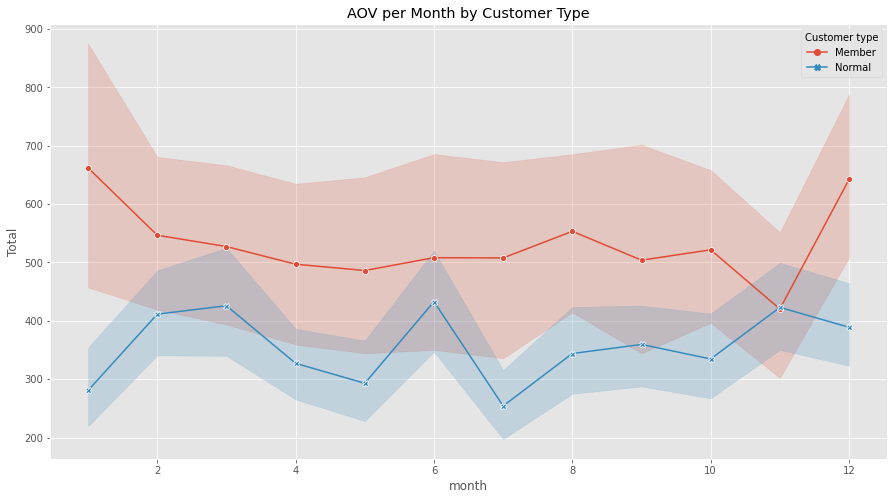

In [46]:
plt.figure(figsize=(15,8))
plt.title('AOV per Month by Customer Type')
sns.lineplot(data=sales_data_2,x='month',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False)

<Figure size 1080x576 with 0 Axes>

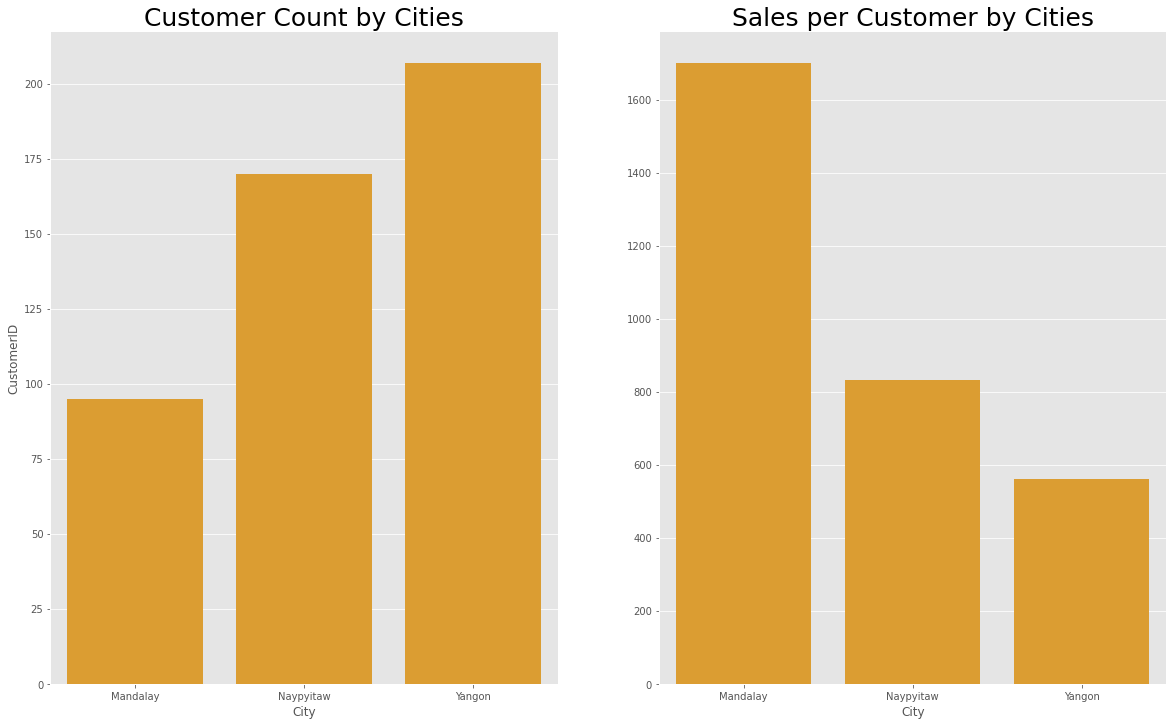

In [47]:
plt.figure(figsize=(15,8))

customer_city = sales_data_2[['City', 'CustomerID']].groupby(['City']).nunique()
sales_city= sales_data_2[["City",'Total']].groupby("City").sum()
sales_per_cx = sales_city["Total"]/customer_city["CustomerID"]

fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size

sns.barplot(x=customer_city.index, y='CustomerID', color="#f7a516",data=customer_city,ax=ax[0])  
_=ax[0].set_title("Customer Count by Cities", size = 25)                            # Chart titl for Subplot 1


sns.barplot(x=customer_city.index, y=sales_per_cx.values, color="#f7a516",ax=ax[1]) 
_=ax[1].set_title("Sales per Customer by Cities", size = 25)                            # Chart title for Subplot 2


In [ ]:
sales_grouped= sales_data_2[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).sum()
mean_ratings = sales_data_2[["City","Customer type",'Rating']].groupby(["City","Customer type"], as_index = False).mean()
aov  = sales_data_2[["City","Customer type",'Total']].groupby(["City","Customer type"], as_index = False).mean()
mean_units_qty = sales_data_2[["City",'Customer type','Quantity']].groupby(["City","Customer type"], as_index = False).mean()
                               
fig,axes= plt.subplots(nrows =2,ncols=2,figsize=(20,12)) 
                              
_=sns.barplot(x=sales_grouped["City"], y='Total',data=sales_grouped,hue = 'Customer type', ax = axes[0,0])  
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
axes[0,0].set_title("Sales by City/Cutomer Type "  , size = 25)     
                              
_=sns.barplot(x=aov["City"], y='Total',data=aov,hue = 'Customer type', ax = axes[0,1])  
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), fontsize=20)    
axes[0,1].set_title("AOV by City/Cutomer Type "  , size = 25)  
                              
_=sns.barplot(x=mean_ratings["City"], y='Rating',data=mean_ratings,hue = 'Customer type', ax = axes[1,0])  
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), fontsize=20)    
axes[1,0].set_title("Mean Ratings by City/Cutomer Type "  , size = 25)  
                              
_=sns.barplot(x=mean_units_qty["City"], y='Quantity',data=mean_units_qty,hue = 'Customer type', ax = axes[1,1])  
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), fontsize=20)    
axes[1,1].set_title("Mean Order Qty by City/Cutomer Type "  , size = 25)  

plt.tight_layout()


"""Insights - 

* Normal customers have more sales in all cities. But that may be due to the fact that Non Members are higher in count as we've seen earlier.
* Members consistently have higher AOV than non members. 
* The AOV is driven by higher order quantity.

## 5. Final Insights

As per the insights discussed so far, we can have following final recommendations -

•	The Members are doing really well in terms of sales numbers for the company. Thus a campaign can be formulated to promote the member sign ups.

•	The spike in Feb sales are a hint that the stores have the potential to have higher sales throughout the year. Specially April to November period 
sales can be significantly improved by some focused marketing.

•	Food & Beverages, Home and lifestyle have the maximum AOV among all categories, but constitute just 20% of the total sales together. The ratings are also better than other categories.
 It is a sign that a strategy around promoting these categories can be formulated.

•	It is a good sign for the supermarket chain that Females are driving majority of the sales. Even females' dominated categories such as Health & Beauty, Fashion are top product categories. 
The company can scale this further to improve overall revenue.
 Female tend to be higher spenders than Men, and company can take more advantage of this data insight.

•	Yangon has least sales and AOV of all cities and the difference is significant too. Hence a focused marketing campaign can be launched to meet the potential sale in this city.